# Suppliers
In this notebook I am going to explore different metrics about our suppliers over different dimensions.
This will help me see the information from different angles and gain insight.
The main metrics are: Customer Ratings and Volume of Business.

## Import the libraries that we are going to use

In [6]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last' #'all' / 'last'

## Load the Datasets and perform some basic formatting

In [7]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])

## Different Plots

   index            supplier  count
0     10        Marconni LLC  13509
1      0         BowTie Corp  11634
2     14         Trusty Limo  10055
3      1           Brother_2   9927
4     15        Vargas Trips   6303
5      4           El Master   5682
6     13          Super Vans   3798
7      9  LES Radio Dispatch   1098


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'Vargas Trips'),
  Text(5, 0, 'El Master'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

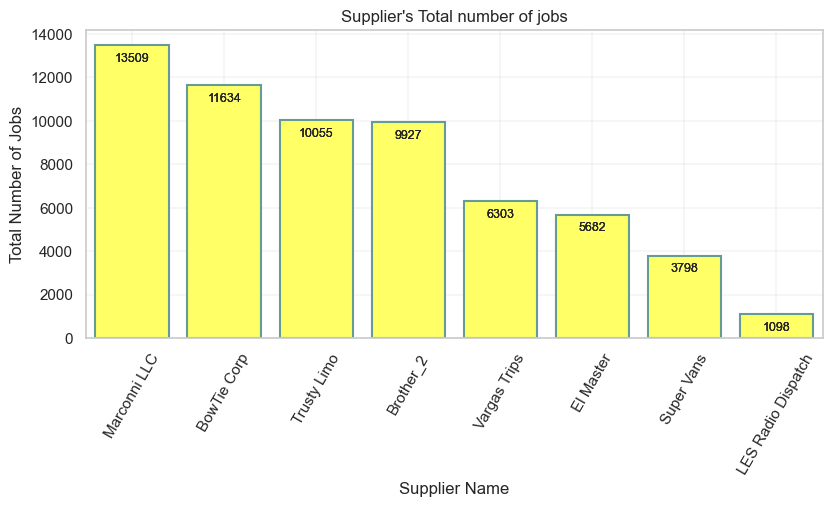

In [8]:
#1 What about starting with the volume of work for each supplier?

#DATA
group = book.groupby(book['supplier'])
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=True)
ax.bar(g1['supplier'],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['count'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Supplier\'s Total number of jobs')

ax.set(xlabel='Supplier Name', ylabel='Total Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



   index            supplier      mean  count
0      6        Marconni LLC  4.597354   4006
1      0         BowTie Corp  4.706941   3890
2      9         Trusty Limo  4.642026   3869
3      1           Brother_2  4.771689   3066
4      2           El Master  4.783093   2153
5     10        Vargas Trips  4.672302   2011
6      8          Super Vans  4.447095    964
7      5  LES Radio Dispatch  4.951923    104


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Marconni LLC'),
  Text(1, 0, 'BowTie Corp'),
  Text(2, 0, 'Trusty Limo'),
  Text(3, 0, 'Brother_2'),
  Text(4, 0, 'El Master'),
  Text(5, 0, 'Vargas Trips'),
  Text(6, 0, 'Super Vans'),
  Text(7, 0, 'LES Radio Dispatch')])

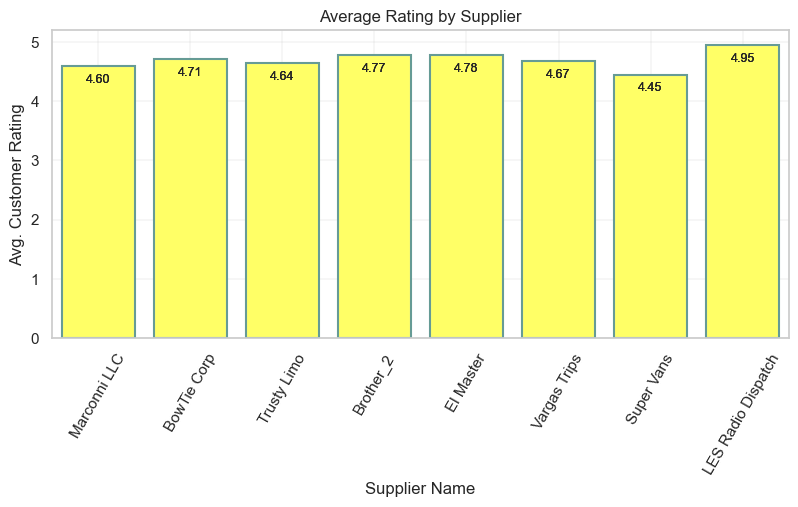

In [9]:
#12 What about the ratings for each?

#DATA
group = rb.groupby(rb['supplier'])
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Average Rating by Supplier')

ax.set(xlabel='Supplier Name', ylabel='Avg. Customer Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()



TypeError: Invalid object type at position 0

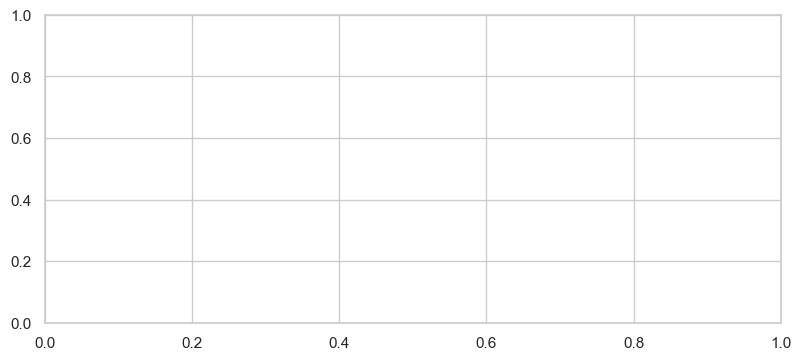

In [10]:
#When were they active?
group=book.groupby([book['pickup_date'].dt.to_period('Q')])
g_total=group.agg({'booking_id':['count']})
g_total.columns=['count_total']
g_total.reset_index(inplace=True)
#g_total=g_total[g_total['count']>100]
#g_total

group=book.groupby([book['pickup_date'].dt.to_period('Q'),book['supplier']])
g=group.agg({'booking_id':['count']})
g.columns=['count_sup']
g.reset_index(inplace=True)
#g=g[g['count']>100]

g2=pd.merge(g,g_total, how='left', left_on=['pickup_date'], right_on=['pickup_date'])
g2['sup_proportion']=(g2['count_sup']/g2['count_total'])*100

g2=g2[g['count_sup']>10]
g2.supplier.unique()
#g2

#sns.barplot(data=g2, x='pickup_date', y='sup_proportion', hue='supplier',estimator=np.sum, palette='bright', multiple='stack')

#tips = sns.load_dataset("tips")
sns.histplot(
    data=g2,
    x="pickup_date", hue="supplier",
    multiple="fill", stat="count",
    discrete=True, shrink=.8
)



#g3=pd.merge(g1, g2, how='inner', left_on=['day_in_advance_groups','in_or_outbound'], right_on=['day_in_advance_groups','in_or_outbound'])
#g3['proportion']=(g3['count_g1']/g3['count_g2'])*100

#VISUALIZATION
width = 14
height = 8
sns.set(rc = {'figure.figsize':(width, height)})


plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#, multiple='stack')#, #palette=['#24b1d1', '#ae24d1'],
    # Add white borders to the bars.
#    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
#    shrink=0.8
#)

<Axes: xlabel='size', ylabel='Proportion'>

NameError: name 'head' is not defined

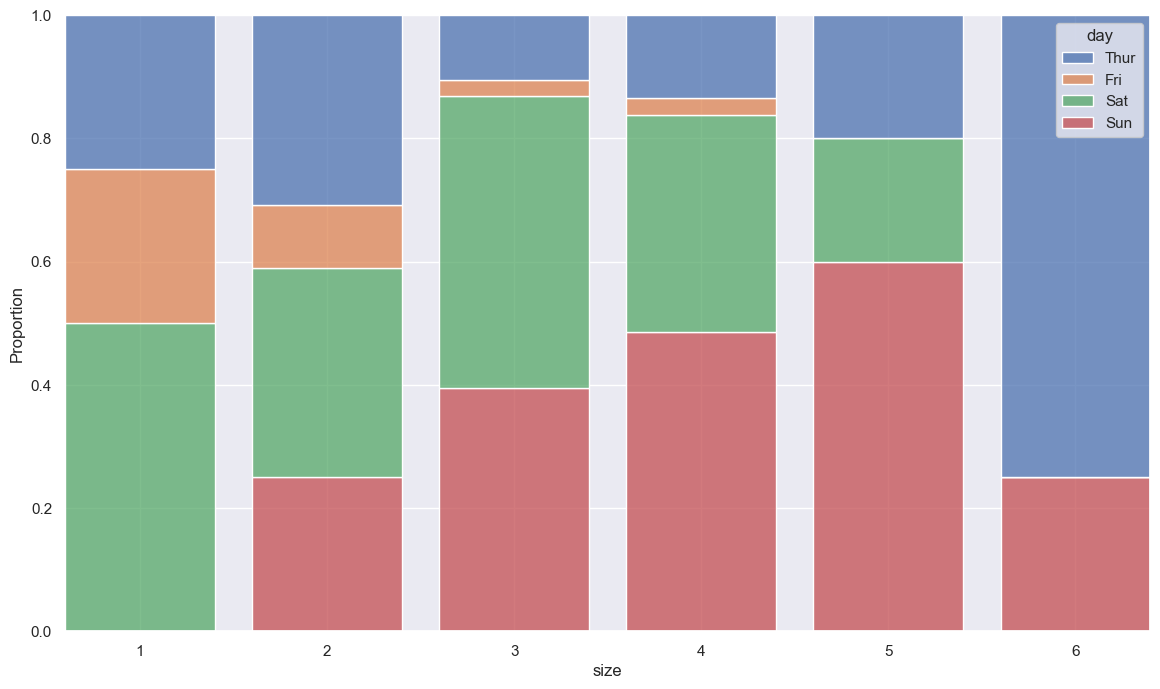

In [ ]:
tips = sns.load_dataset("tips")
sns.histplot(
    data=tips,
    x="size", hue="day",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)


In [ ]:
tips.head()
tips.dtypes


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


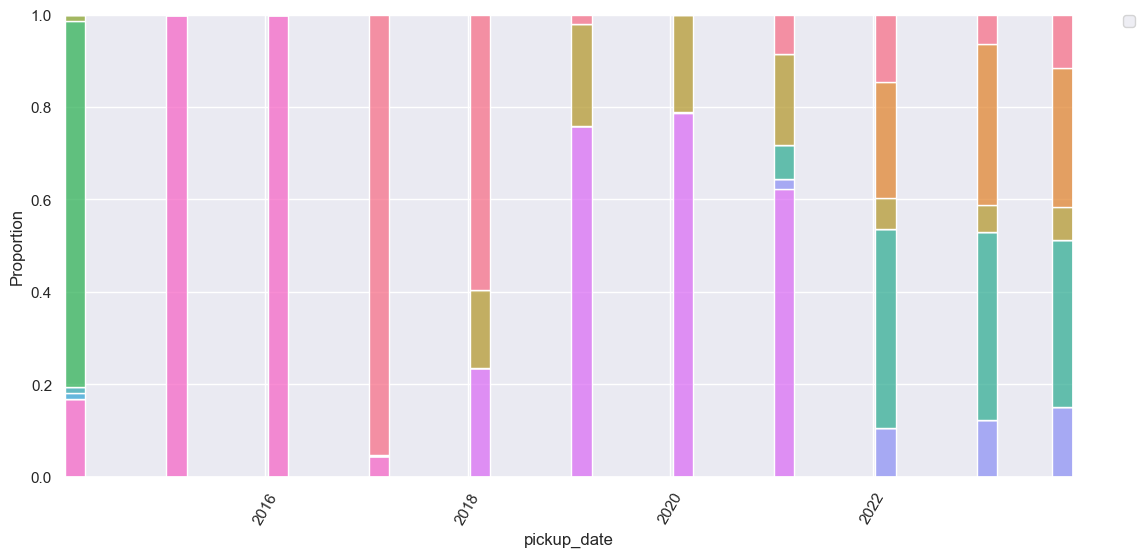

In [70]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.year.astype(int)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.dtypes

#['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2']
sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat="proportion",
    shrink=.8
)
plt.xticks(rotation=60)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


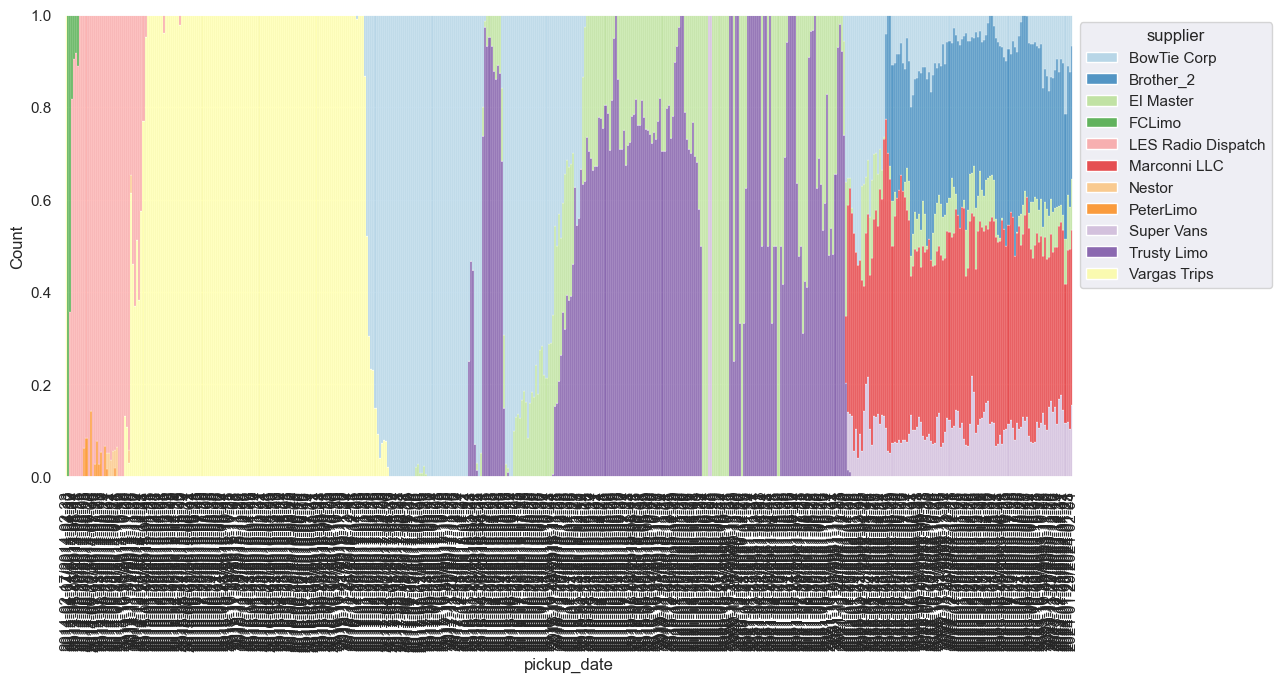

In [65]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('W').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


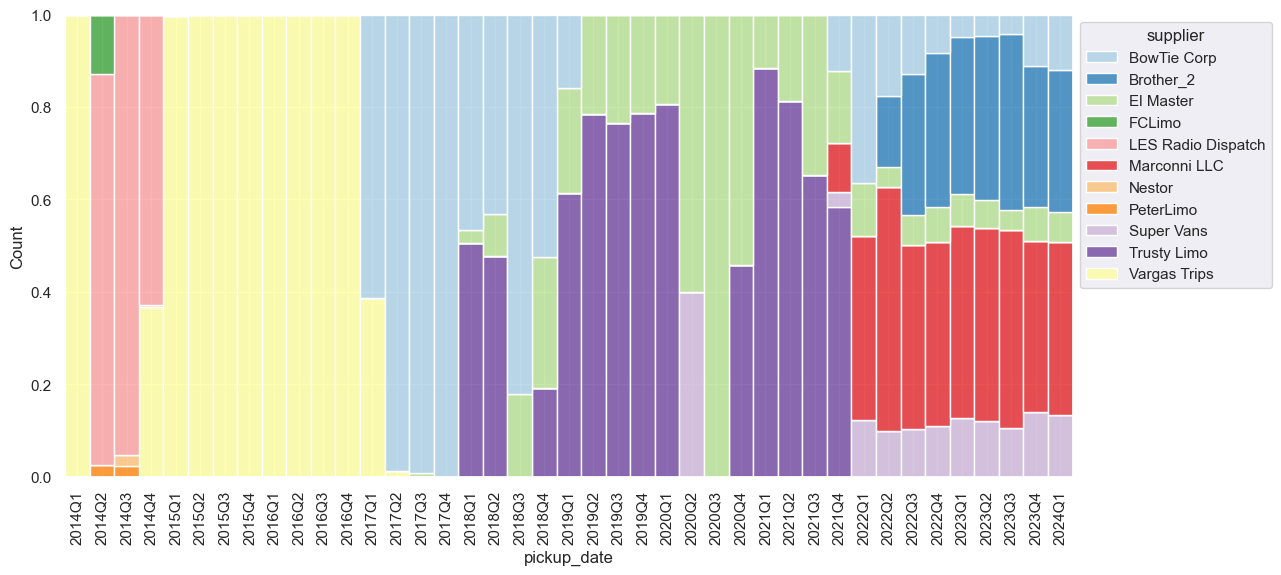

In [66]:
df_stacks=book[['pickup_date' , 'supplier','booking_id']]
df_stacks=df_stacks[~(df_stacks['supplier'].isna())]
df_stacks=df_stacks[df_stacks['pickup_date']<'2024-02-01']
df_stacks['pickup_date']=df_stacks['pickup_date'].dt.to_period('Q').astype(str)
df_stacks=df_stacks[df_stacks['supplier'].isin(['FCLimo', 'LES Radio Dispatch', 'Nestor', 'PeterLimo', 'Vargas Trips', 'BowTie Corp', 'El Master', 'Trusty Limo', 'Marconni LLC', 'Super Vans', 'Brother_2'])]
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['supplier']=df_stacks['supplier'].astype('category')
df_stacks['booking_id']=1
df_stacks.sort_values(by='pickup_date' ,inplace=True)
#df_stacks.dtypes

#VISUALIZATION
width = 13
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

ax=sns.histplot(
    data=df_stacks,
    x="pickup_date", hue="supplier",
    multiple="fill", stat='count',
    palette=sns.color_palette("Paired", n_colors=11)
    
    #shrink=.8
)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)


AttributeError: Rectangle.set() got an unexpected keyword argument 'discrete'

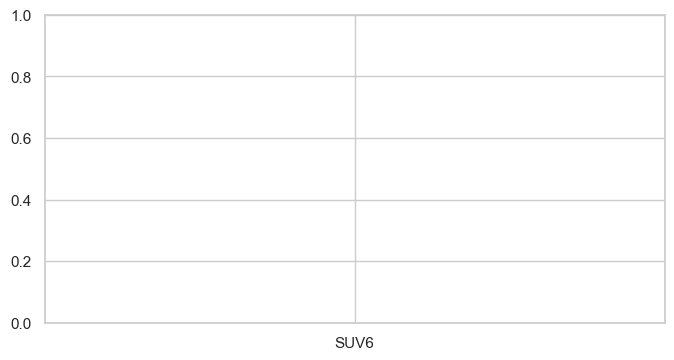

In [107]:
#DATA
group = rb.groupby([rb['supplier'],rb['vehicle_category']]) #[rb['pickup_date'].dt.year==2024]
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=15]
g1
#g1.reset_index(inplace=True)
#print(g1)

width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
#******************
ax=sns.barplot(data=g1, x='vehicle_category', y='mean' ,hue='supplier')
##*****************
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-20, fontsize=8, rotation=90 )
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=3.9 ,ymax=5.1)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Average Rating by Supplier and Vehicle')

ax.set(xlabel='Type of Vehicle', ylabel='Avg. Customer Rating')
#plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=0)

In [ ]:
#Rating by vehicle and by Supplier

#DATA
group = rb.groupby('supplier','vehicle_category')
g1=group.agg({'rating_score':['mean','count']})
g1.columns=['mean','count']
g1.reset_index(inplace=True)
g1.sort_values(by='count', ascending=False, inplace=True)
g1=g1[g1['count']>=100]
g1.reset_index(inplace=True)
print(g1)

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66','#ffff66']

ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=True)
ax.bar(g1['supplier'],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x=g1['supplier'],y=g1['mean'],  fill=False, color='#669b95')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

#months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
#ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
#ax.set(yticks=np.arange(0, 14000, 1000))
#ax.set_xlim(xmin=-1.5,xmax=7.5)

plt.title('Average Rating by Supplier')

ax.set(xlabel='Supplier Name', ylabel='Avg. Customer Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=60)
#plt.show()

